In [1]:
#importing all packages
import matplotlib.pyplot as plt
import numpy as np
# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.7.1


In [2]:
#Loading training and testing data as .npy files#Datasets are here in'.npy'format after being scaled individually based on their 
#individual maximum amplitude

def npy_loader(path):
    sample = torch.from_numpy(np.load(path))
    return sample


train_set = torchvision.datasets.DatasetFolder(root='./data/gamma_proton_CNN_23-02-2021/train_set/',loader=npy_loader, 
                                               extensions='.npy', transform=None)

trainloader = torch.utils.data.DataLoader(train_set, batch_size=10,
                                         shuffle=True, num_workers=2)

test_set = torchvision.datasets.DatasetFolder(root='./data/gamma_proton_CNN_23-02-2021/test_set/',loader=npy_loader, 
                                               extensions='.npy', transform=None)

testloader = torch.utils.data.DataLoader(test_set, batch_size=1,
                                         shuffle=False, num_workers=2)

classes = ('gamma', 'proton')
print(classes)
print(len(train_set))
print(len(test_set))

('gamma', 'proton')
4200
1680


torch.Size([10, 52, 52])
torch.Size([52, 52])
1.0


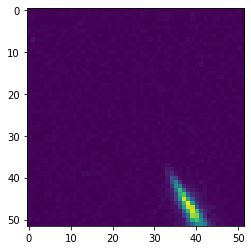

gamma


In [3]:
##functions to show an image
def imshow(img):
    npimg = img.numpy()
    print(img.size())
    print(img[0].size())
    plt.imshow(npimg[0])
    print(np.max(npimg))
    plt.show()


##get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

##show images
imshow(torchvision.utils.make_grid(images))

##print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

In [4]:
#crosschecking the size using the chosen dimensions before defining the convolutional 
#layers:#Use the equation ((W-F+2P)S)+1 check if the size of the output layesrs are correct!
images=images.view(-1,1,52,52)
print(images.shape)
conv1=nn.Conv2d(1,10,5)
pool=nn.MaxPool2d(2,2)
conv2=nn.Conv2d(10,4,3)
x=conv1(images)
print(x.shape)
x=pool(x)
print(x.shape)
x=conv2(x)
print(x.shape)
x=pool(x)
print(x.shape)

torch.Size([10, 1, 52, 52])
torch.Size([10, 10, 48, 48])
torch.Size([10, 10, 24, 24])
torch.Size([10, 4, 22, 22])
torch.Size([10, 4, 11, 11])


In [5]:
#Define a Convolutional Neural Network(For  1-channel images)

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(1,10,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(10,4,3)
        self.fc1=nn.Linear(4*11*11,80)
        self.fc2=nn.Linear(80,1)
    def forward(self, x):
        x=x.view(-1,1,52,52)
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,4*11*11)
        x=F.relu(self.fc1(x))
        x=self.fc2(x)
        return x
net=Net()

In [6]:
##Define a Loss function and optimizer:#Loss function:Binary Cross-Entropy loss,
##optimizer: Adam#BCE_loss function needs the usage of Sigmoid activation function to be given for the
##binary classification

m = nn.Sigmoid()
criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [7]:
##Train the network
# loop over our data iterator, and feed the inputs to the network and optimize

for epoch in range(80):# loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        labels = torch.tensor(labels, dtype = torch.float)
        #print(labels.shape)
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        #print((m(outputs)).shape)
        #print(labels.shape)
        
        #use the sigmoid function(m) before calculation the gradient of loss function
        loss = criterion(m(outputs.squeeze()), labels)
        loss.backward()
        optimizer.step()
        
        # print statistics:
        # print every 10 mini-batches
        running_loss += loss.item()
        if i % 10 == 9:                                                           
            print('[%d,%5d] loss:%.3f'% (epoch+1, i+1, running_loss/10))
            running_loss=0.0
            
print('Finished Training')
        

<ipython-input-7-f2bf068de32c>:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype = torch.float)
/home/retnakaran/anaconda3/lib/python3.8/site-packages/torch/autograd/__init__.py:130: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  Variable._execution_engine.run_backward(


[1,   10] loss:0.690
[1,   20] loss:0.680
[1,   30] loss:0.683
[1,   40] loss:0.705
[1,   50] loss:0.665
[1,   60] loss:0.678
[1,   70] loss:0.680
[1,   80] loss:0.683
[1,   90] loss:0.689
[1,  100] loss:0.653
[1,  110] loss:0.683
[1,  120] loss:0.679
[1,  130] loss:0.674
[1,  140] loss:0.647
[1,  150] loss:0.626
[1,  160] loss:0.642
[1,  170] loss:0.623
[1,  180] loss:0.712
[1,  190] loss:0.652
[1,  200] loss:0.666
[1,  210] loss:0.665
[1,  220] loss:0.629
[1,  230] loss:0.679
[1,  240] loss:0.616
[1,  250] loss:0.594
[1,  260] loss:0.604
[1,  270] loss:0.714
[1,  280] loss:0.650
[1,  290] loss:0.646
[1,  300] loss:0.653
[1,  310] loss:0.655
[1,  320] loss:0.635
[1,  330] loss:0.628
[1,  340] loss:0.685
[1,  350] loss:0.615
[1,  360] loss:0.636
[1,  370] loss:0.647
[1,  380] loss:0.605
[1,  390] loss:0.574
[1,  400] loss:0.652
[1,  410] loss:0.604
[1,  420] loss:0.635
[2,   10] loss:0.669
[2,   20] loss:0.632
[2,   30] loss:0.610
[2,   40] loss:0.614
[2,   50] loss:0.563
[2,   60] los

[10,  150] loss:0.344
[10,  160] loss:0.410
[10,  170] loss:0.343
[10,  180] loss:0.332
[10,  190] loss:0.335
[10,  200] loss:0.357
[10,  210] loss:0.345
[10,  220] loss:0.270
[10,  230] loss:0.426
[10,  240] loss:0.332
[10,  250] loss:0.364
[10,  260] loss:0.308
[10,  270] loss:0.386
[10,  280] loss:0.327
[10,  290] loss:0.379
[10,  300] loss:0.436
[10,  310] loss:0.309
[10,  320] loss:0.353
[10,  330] loss:0.394
[10,  340] loss:0.352
[10,  350] loss:0.395
[10,  360] loss:0.393
[10,  370] loss:0.270
[10,  380] loss:0.321
[10,  390] loss:0.497
[10,  400] loss:0.376
[10,  410] loss:0.477
[10,  420] loss:0.353
[11,   10] loss:0.316
[11,   20] loss:0.397
[11,   30] loss:0.298
[11,   40] loss:0.345
[11,   50] loss:0.357
[11,   60] loss:0.310
[11,   70] loss:0.448
[11,   80] loss:0.314
[11,   90] loss:0.414
[11,  100] loss:0.374
[11,  110] loss:0.344
[11,  120] loss:0.376
[11,  130] loss:0.329
[11,  140] loss:0.378
[11,  150] loss:0.351
[11,  160] loss:0.349
[11,  170] loss:0.417
[11,  180]

[19,  110] loss:0.213
[19,  120] loss:0.231
[19,  130] loss:0.152
[19,  140] loss:0.198
[19,  150] loss:0.249
[19,  160] loss:0.289
[19,  170] loss:0.135
[19,  180] loss:0.375
[19,  190] loss:0.313
[19,  200] loss:0.314
[19,  210] loss:0.247
[19,  220] loss:0.248
[19,  230] loss:0.314
[19,  240] loss:0.295
[19,  250] loss:0.254
[19,  260] loss:0.227
[19,  270] loss:0.241
[19,  280] loss:0.164
[19,  290] loss:0.174
[19,  300] loss:0.225
[19,  310] loss:0.296
[19,  320] loss:0.244
[19,  330] loss:0.275
[19,  340] loss:0.247
[19,  350] loss:0.211
[19,  360] loss:0.309
[19,  370] loss:0.224
[19,  380] loss:0.239
[19,  390] loss:0.254
[19,  400] loss:0.221
[19,  410] loss:0.206
[19,  420] loss:0.244
[20,   10] loss:0.190
[20,   20] loss:0.150
[20,   30] loss:0.249
[20,   40] loss:0.252
[20,   50] loss:0.235
[20,   60] loss:0.304
[20,   70] loss:0.301
[20,   80] loss:0.208
[20,   90] loss:0.245
[20,  100] loss:0.188
[20,  110] loss:0.221
[20,  120] loss:0.226
[20,  130] loss:0.196
[20,  140]

[28,   60] loss:0.091
[28,   70] loss:0.109
[28,   80] loss:0.158
[28,   90] loss:0.245
[28,  100] loss:0.128
[28,  110] loss:0.294
[28,  120] loss:0.274
[28,  130] loss:0.220
[28,  140] loss:0.289
[28,  150] loss:0.237
[28,  160] loss:0.115
[28,  170] loss:0.177
[28,  180] loss:0.202
[28,  190] loss:0.257
[28,  200] loss:0.195
[28,  210] loss:0.303
[28,  220] loss:0.235
[28,  230] loss:0.182
[28,  240] loss:0.127
[28,  250] loss:0.196
[28,  260] loss:0.156
[28,  270] loss:0.135
[28,  280] loss:0.167
[28,  290] loss:0.206
[28,  300] loss:0.137
[28,  310] loss:0.151
[28,  320] loss:0.207
[28,  330] loss:0.212
[28,  340] loss:0.197
[28,  350] loss:0.246
[28,  360] loss:0.190
[28,  370] loss:0.217
[28,  380] loss:0.151
[28,  390] loss:0.192
[28,  400] loss:0.163
[28,  410] loss:0.275
[28,  420] loss:0.471
[29,   10] loss:0.300
[29,   20] loss:0.220
[29,   30] loss:0.150
[29,   40] loss:0.151
[29,   50] loss:0.187
[29,   60] loss:0.120
[29,   70] loss:0.123
[29,   80] loss:0.194
[29,   90]

[37,   10] loss:0.123
[37,   20] loss:0.144
[37,   30] loss:0.182
[37,   40] loss:0.222
[37,   50] loss:0.201
[37,   60] loss:0.166
[37,   70] loss:0.113
[37,   80] loss:0.091
[37,   90] loss:0.147
[37,  100] loss:0.110
[37,  110] loss:0.114
[37,  120] loss:0.124
[37,  130] loss:0.185
[37,  140] loss:0.182
[37,  150] loss:0.159
[37,  160] loss:0.119
[37,  170] loss:0.191
[37,  180] loss:0.060
[37,  190] loss:0.134
[37,  200] loss:0.163
[37,  210] loss:0.170
[37,  220] loss:0.095
[37,  230] loss:0.177
[37,  240] loss:0.158
[37,  250] loss:0.183
[37,  260] loss:0.097
[37,  270] loss:0.106
[37,  280] loss:0.131
[37,  290] loss:0.188
[37,  300] loss:0.122
[37,  310] loss:0.180
[37,  320] loss:0.130
[37,  330] loss:0.148
[37,  340] loss:0.216
[37,  350] loss:0.172
[37,  360] loss:0.134
[37,  370] loss:0.133
[37,  380] loss:0.151
[37,  390] loss:0.262
[37,  400] loss:0.143
[37,  410] loss:0.153
[37,  420] loss:0.207
[38,   10] loss:0.169
[38,   20] loss:0.136
[38,   30] loss:0.124
[38,   40]

[45,  390] loss:0.170
[45,  400] loss:0.112
[45,  410] loss:0.128
[45,  420] loss:0.134
[46,   10] loss:0.148
[46,   20] loss:0.164
[46,   30] loss:0.091
[46,   40] loss:0.103
[46,   50] loss:0.080
[46,   60] loss:0.117
[46,   70] loss:0.108
[46,   80] loss:0.107
[46,   90] loss:0.097
[46,  100] loss:0.140
[46,  110] loss:0.101
[46,  120] loss:0.098
[46,  130] loss:0.178
[46,  140] loss:0.105
[46,  150] loss:0.074
[46,  160] loss:0.070
[46,  170] loss:0.156
[46,  180] loss:0.107
[46,  190] loss:0.188
[46,  200] loss:0.087
[46,  210] loss:0.200
[46,  220] loss:0.173
[46,  230] loss:0.125
[46,  240] loss:0.176
[46,  250] loss:0.181
[46,  260] loss:0.128
[46,  270] loss:0.122
[46,  280] loss:0.130
[46,  290] loss:0.162
[46,  300] loss:0.074
[46,  310] loss:0.084
[46,  320] loss:0.081
[46,  330] loss:0.157
[46,  340] loss:0.245
[46,  350] loss:0.218
[46,  360] loss:0.141
[46,  370] loss:0.247
[46,  380] loss:0.179
[46,  390] loss:0.124
[46,  400] loss:0.129
[46,  410] loss:0.075
[46,  420]

[54,  340] loss:0.095
[54,  350] loss:0.129
[54,  360] loss:0.234
[54,  370] loss:0.191
[54,  380] loss:0.199
[54,  390] loss:0.099
[54,  400] loss:0.114
[54,  410] loss:0.136
[54,  420] loss:0.169
[55,   10] loss:0.094
[55,   20] loss:0.241
[55,   30] loss:0.121
[55,   40] loss:0.169
[55,   50] loss:0.140
[55,   60] loss:0.195
[55,   70] loss:0.124
[55,   80] loss:0.083
[55,   90] loss:0.098
[55,  100] loss:0.134
[55,  110] loss:0.147
[55,  120] loss:0.124
[55,  130] loss:0.132
[55,  140] loss:0.146
[55,  150] loss:0.096
[55,  160] loss:0.169
[55,  170] loss:0.163
[55,  180] loss:0.195
[55,  190] loss:0.066
[55,  200] loss:0.129
[55,  210] loss:0.073
[55,  220] loss:0.116
[55,  230] loss:0.156
[55,  240] loss:0.125
[55,  250] loss:0.132
[55,  260] loss:0.131
[55,  270] loss:0.071
[55,  280] loss:0.088
[55,  290] loss:0.183
[55,  300] loss:0.238
[55,  310] loss:0.171
[55,  320] loss:0.113
[55,  330] loss:0.190
[55,  340] loss:0.108
[55,  350] loss:0.113
[55,  360] loss:0.125
[55,  370]

[63,  290] loss:0.107
[63,  300] loss:0.196
[63,  310] loss:0.060
[63,  320] loss:0.119
[63,  330] loss:0.062
[63,  340] loss:0.070
[63,  350] loss:0.123
[63,  360] loss:0.167
[63,  370] loss:0.119
[63,  380] loss:0.130
[63,  390] loss:0.090
[63,  400] loss:0.226
[63,  410] loss:0.147
[63,  420] loss:0.149
[64,   10] loss:0.154
[64,   20] loss:0.115
[64,   30] loss:0.067
[64,   40] loss:0.076
[64,   50] loss:0.069
[64,   60] loss:0.113
[64,   70] loss:0.052
[64,   80] loss:0.156
[64,   90] loss:0.073
[64,  100] loss:0.126
[64,  110] loss:0.192
[64,  120] loss:0.045
[64,  130] loss:0.096
[64,  140] loss:0.174
[64,  150] loss:0.120
[64,  160] loss:0.177
[64,  170] loss:0.100
[64,  180] loss:0.163
[64,  190] loss:0.060
[64,  200] loss:0.096
[64,  210] loss:0.049
[64,  220] loss:0.109
[64,  230] loss:0.099
[64,  240] loss:0.105
[64,  250] loss:0.121
[64,  260] loss:0.159
[64,  270] loss:0.053
[64,  280] loss:0.149
[64,  290] loss:0.141
[64,  300] loss:0.100
[64,  310] loss:0.190
[64,  320]

[72,  240] loss:0.242
[72,  250] loss:0.126
[72,  260] loss:0.096
[72,  270] loss:0.159
[72,  280] loss:0.135
[72,  290] loss:0.102
[72,  300] loss:0.083
[72,  310] loss:0.103
[72,  320] loss:0.095
[72,  330] loss:0.134
[72,  340] loss:0.107
[72,  350] loss:0.062
[72,  360] loss:0.147
[72,  370] loss:0.107
[72,  380] loss:0.138
[72,  390] loss:0.145
[72,  400] loss:0.152
[72,  410] loss:0.107
[72,  420] loss:0.084
[73,   10] loss:0.150
[73,   20] loss:0.086
[73,   30] loss:0.042
[73,   40] loss:0.085
[73,   50] loss:0.040
[73,   60] loss:0.072
[73,   70] loss:0.194
[73,   80] loss:0.082
[73,   90] loss:0.120
[73,  100] loss:0.079
[73,  110] loss:0.098
[73,  120] loss:0.076
[73,  130] loss:0.048
[73,  140] loss:0.090
[73,  150] loss:0.068
[73,  160] loss:0.131
[73,  170] loss:0.065
[73,  180] loss:0.061
[73,  190] loss:0.112
[73,  200] loss:0.093
[73,  210] loss:0.136
[73,  220] loss:0.038
[73,  230] loss:0.139
[73,  240] loss:0.068
[73,  250] loss:0.183
[73,  260] loss:0.214
[73,  270]

In [8]:
#save our trained model
#best
PATH='./gamma_proton_23-02-2021/gamma_proton_latest_23-02-2021_latest_16-03-2021.pth'
torch.save(net.state_dict(), PATH)

torch.Size([3, 52, 52])
torch.Size([52, 52])
1.0


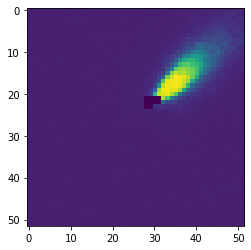

GroundTruth: gamma
tensor([0])


In [9]:
#Check the ground truth here on test_images
dataiter=iter(testloader)
images, labels=dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%5s'%classes[labels[j]]for j in range(1)))
print(labels)

In [10]:
#load back in our saved model
net=Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
##Test the network on the test data:#check if the network has learnt anything at all.
#check this by predicting the class label that the neural network outputs, and checking it
#against the ground-truth we got before:

#now let us see what the neural network thinks these examples above are:
outputs= m(net(images))
predicted = outputs > 0.5
print('Predicted:',' '.join(' %5s' % classes[predicted[j]] for j in range(1)))

Predicted:  proton


In [12]:
#Let us look at how the network performs on the whole test_set
#For test_set of batch size 1
correct=0
total=0
test_y=[]
y_score=[]
with torch.no_grad():
    for data in testloader:
        images, labels=data
        outputs=m(net(images))
        predicted=(outputs.data > 0.5)
        total+=labels.size(0)
        correct+=(predicted==labels).sum().item()
        y_score.append(outputs.numpy())
        test_y.append(labels)
        #print(images.shape)
        
y_score=np.vstack(y_score).flatten()
test_y=np.vstack(test_y).flatten()
print('Accuracy of the network on the test images:%d%%' %(100*correct/total))
#print(test_y)
#print(y_score[test_y==0])

Accuracy of the network on the test images:88%


In [13]:
#what are the classes that performed well, and the classes that did not perform well:
class_correct=list(0. for i in range(2))
class_total=list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels=data
        outputs=m(net(images))
        predicted=outputs > 0.5
        c=(predicted==labels).squeeze()
        label=labels
        class_correct[label]+=c.item()
        class_total[label]+=1
for i in range(2):
    print('Accuracy of %5s : %2d %%' % (classes[i],100*class_correct[i]/class_total[i]))
    #print(class_correct[0]/class_total[0])
    #print(i)
        

Accuracy of gamma : 95 %
Accuracy of proton : 83 %


27
173
(1, 52, 52)
(52, 52)
1.0


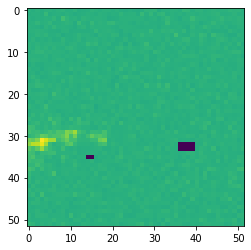

(1, 52, 52)
(52, 52)
1.0


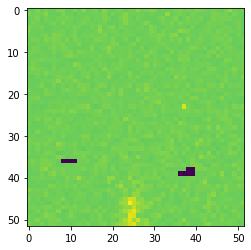

(1, 52, 52)
(52, 52)
1.0


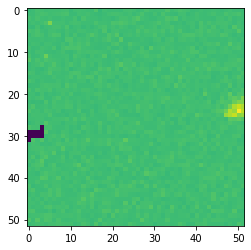

(1, 52, 52)
(52, 52)
1.0


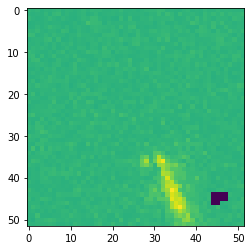

(1, 52, 52)
(52, 52)
1.0


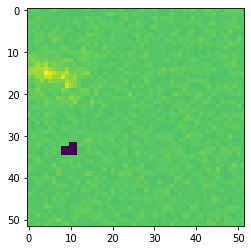

(1, 52, 52)
(52, 52)
1.0


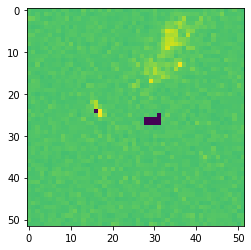

(1, 52, 52)
(52, 52)
1.0


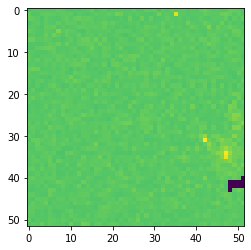

(1, 52, 52)
(52, 52)
1.0


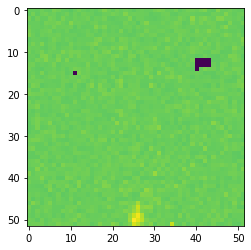

(1, 52, 52)
(52, 52)
1.0


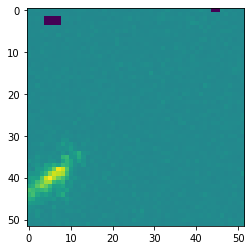

(1, 52, 52)
(52, 52)
1.0


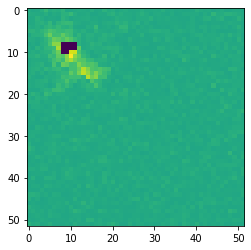

(1, 52, 52)
(52, 52)
1.0


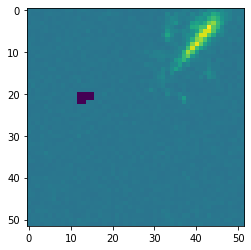

(1, 52, 52)
(52, 52)
1.0


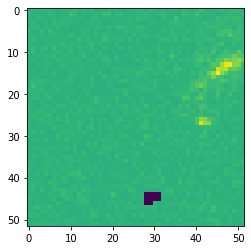

(1, 52, 52)
(52, 52)
1.0


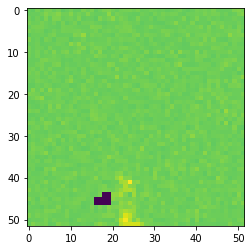

(1, 52, 52)
(52, 52)
1.0


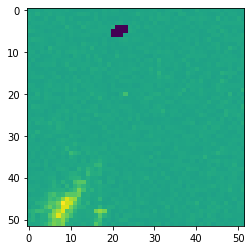

(1, 52, 52)
(52, 52)
1.0


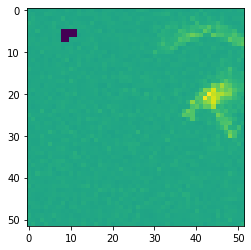

(1, 52, 52)
(52, 52)
1.0


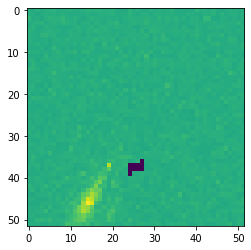

(1, 52, 52)
(52, 52)
1.0


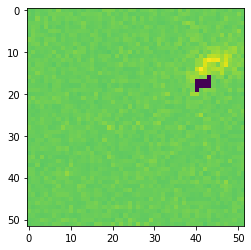

(1, 52, 52)
(52, 52)
1.0


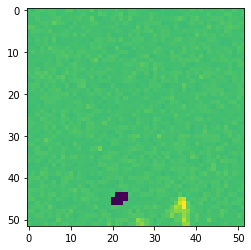

(1, 52, 52)
(52, 52)
1.0


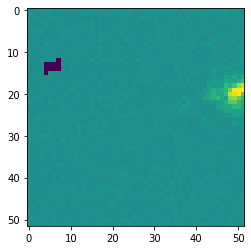

(1, 52, 52)
(52, 52)
1.0


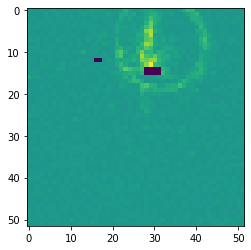

(1, 52, 52)
(52, 52)
1.0


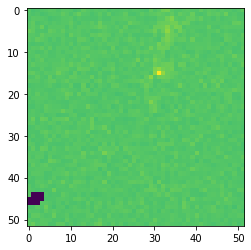

(1, 52, 52)
(52, 52)
1.0


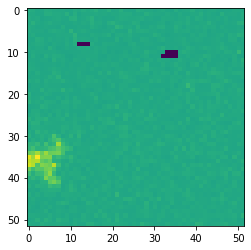

(1, 52, 52)
(52, 52)
1.0


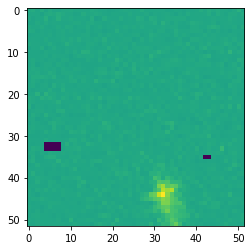

(1, 52, 52)
(52, 52)
1.0


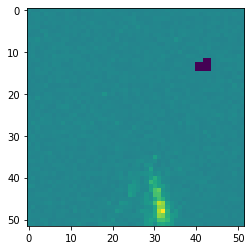

(1, 52, 52)
(52, 52)
1.0


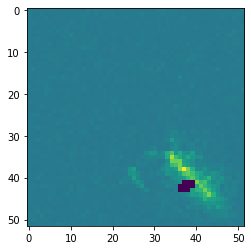

(1, 52, 52)
(52, 52)
1.0


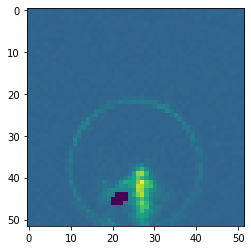

(1, 52, 52)
(52, 52)
1.0


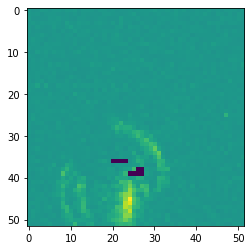

(1, 52, 52)
(52, 52)
1.0


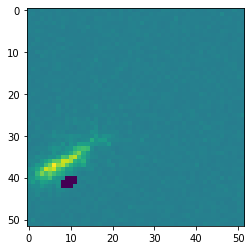

(1, 52, 52)
(52, 52)
1.0


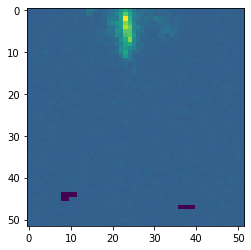

(1, 52, 52)
(52, 52)
1.0


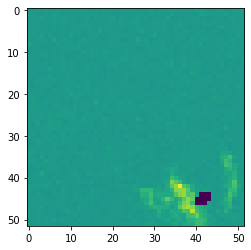

(1, 52, 52)
(52, 52)
1.0


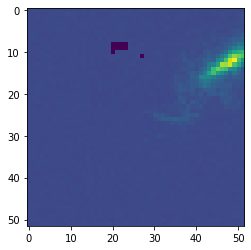

(1, 52, 52)
(52, 52)
1.0


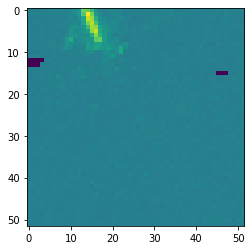

(1, 52, 52)
(52, 52)
1.0


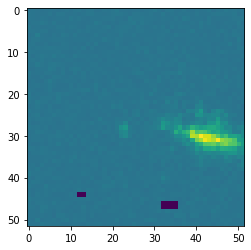

(1, 52, 52)
(52, 52)
1.0


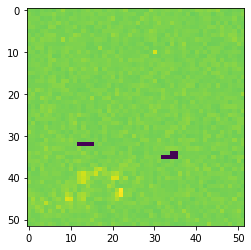

(1, 52, 52)
(52, 52)
1.0


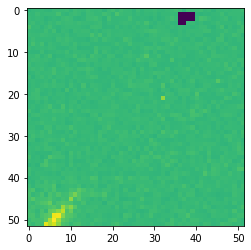

(1, 52, 52)
(52, 52)
1.0


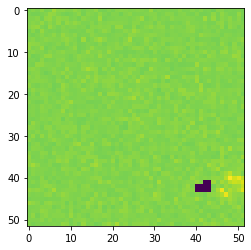

(1, 52, 52)
(52, 52)
1.0


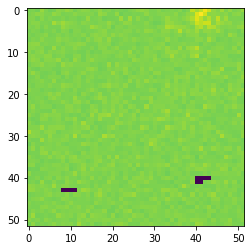

(1, 52, 52)
(52, 52)
1.0


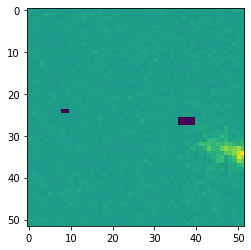

(1, 52, 52)
(52, 52)
1.0


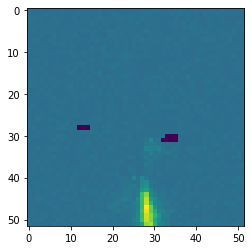

(1, 52, 52)
(52, 52)
1.0


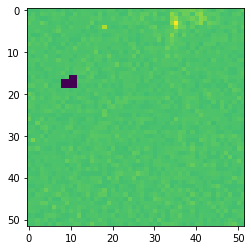

(1, 52, 52)
(52, 52)
1.0


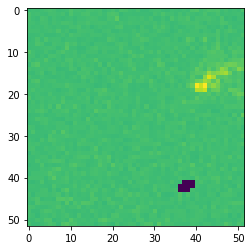

(1, 52, 52)
(52, 52)
1.0


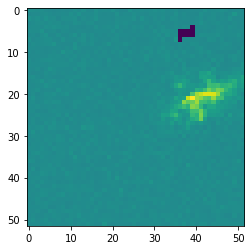

(1, 52, 52)
(52, 52)
1.0


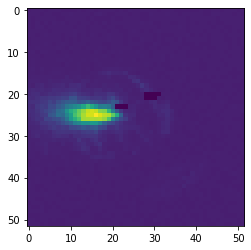

(1, 52, 52)
(52, 52)
1.0


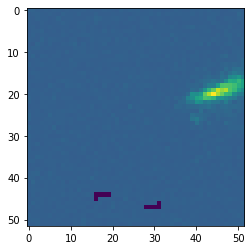

(1, 52, 52)
(52, 52)
1.0


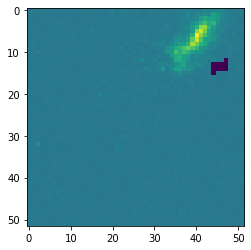

(1, 52, 52)
(52, 52)
1.0


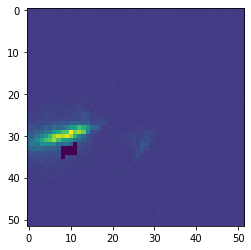

(1, 52, 52)
(52, 52)
1.0


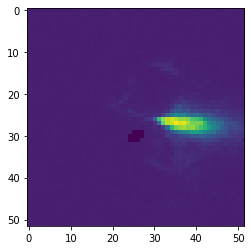

(1, 52, 52)
(52, 52)
1.0


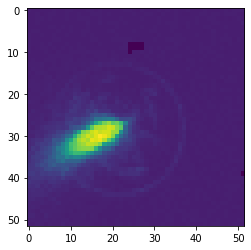

(1, 52, 52)
(52, 52)
1.0


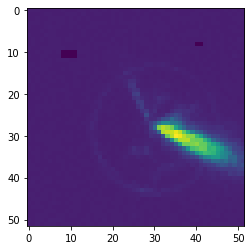

(1, 52, 52)
(52, 52)
1.0


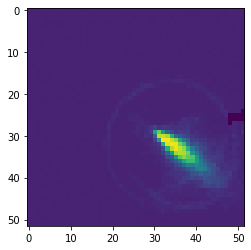

(1, 52, 52)
(52, 52)
1.0


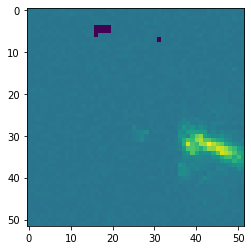

(1, 52, 52)
(52, 52)
1.0


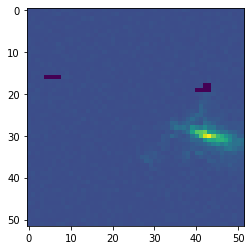

(1, 52, 52)
(52, 52)
1.0


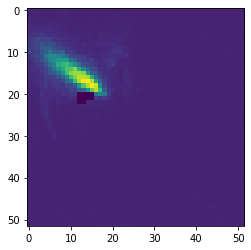

(1, 52, 52)
(52, 52)
1.0


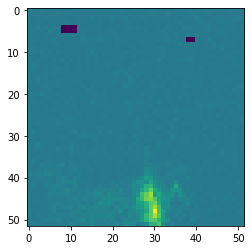

(1, 52, 52)
(52, 52)
1.0


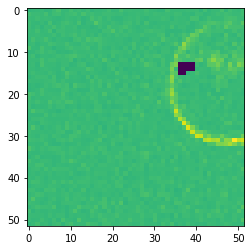

(1, 52, 52)
(52, 52)
1.0


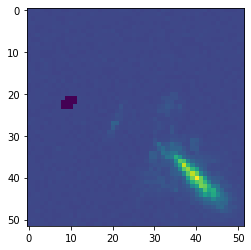

(1, 52, 52)
(52, 52)
0.869


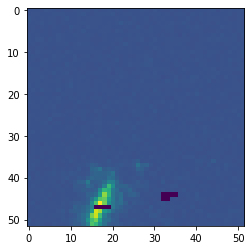

(1, 52, 52)
(52, 52)
1.0


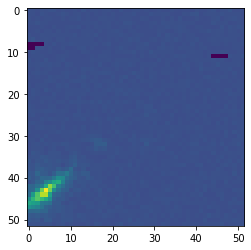

(1, 52, 52)
(52, 52)
1.0


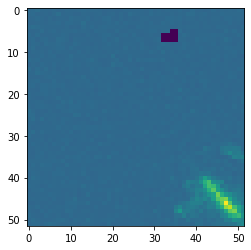

(1, 52, 52)
(52, 52)
1.0


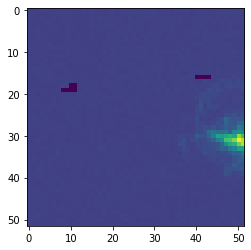

(1, 52, 52)
(52, 52)
1.0


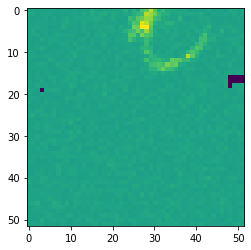

(1, 52, 52)
(52, 52)
1.0


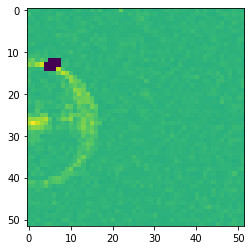

(1, 52, 52)
(52, 52)
1.0


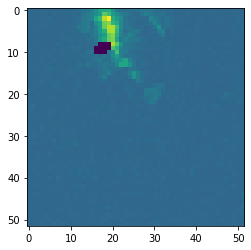

(1, 52, 52)
(52, 52)
1.0


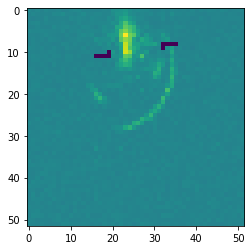

(1, 52, 52)
(52, 52)
1.0


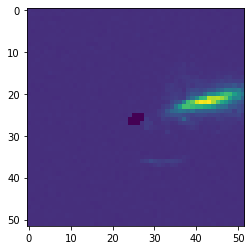

(1, 52, 52)
(52, 52)
1.0


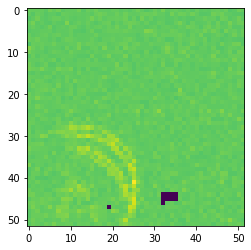

(1, 52, 52)
(52, 52)
1.0


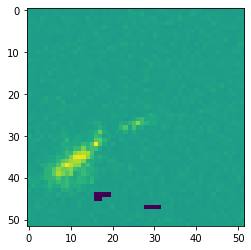

(1, 52, 52)
(52, 52)
1.0


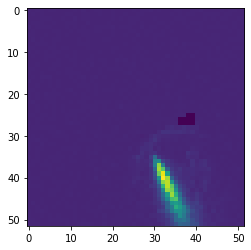

(1, 52, 52)
(52, 52)
1.0


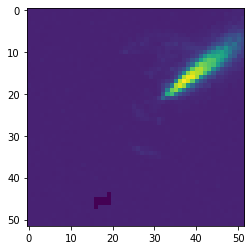

(1, 52, 52)
(52, 52)
1.0


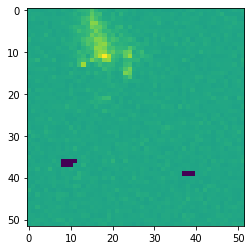

(1, 52, 52)
(52, 52)
1.0


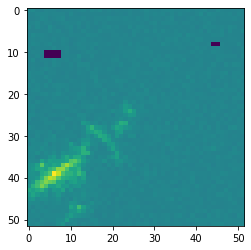

(1, 52, 52)
(52, 52)
1.0


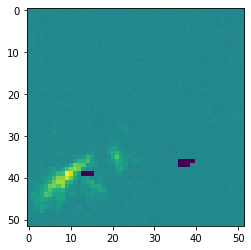

(1, 52, 52)
(52, 52)
1.0


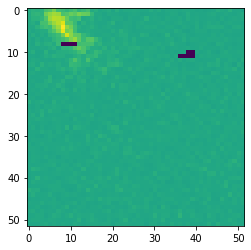

(1, 52, 52)
(52, 52)
1.0


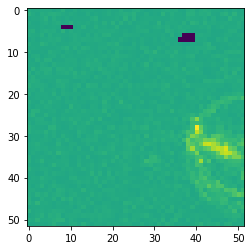

(1, 52, 52)
(52, 52)
1.0


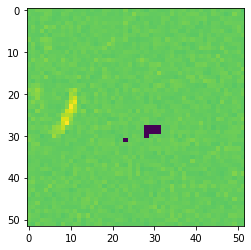

(1, 52, 52)
(52, 52)
1.0


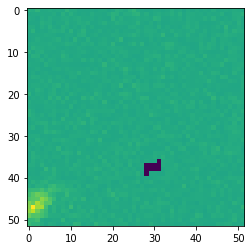

(1, 52, 52)
(52, 52)
1.0


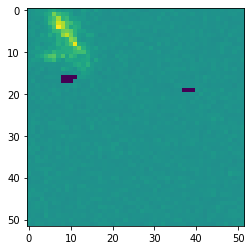

(1, 52, 52)
(52, 52)
1.0


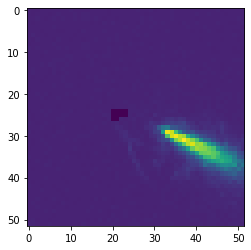

(1, 52, 52)
(52, 52)
1.0


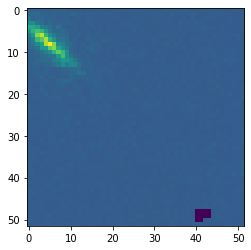

(1, 52, 52)
(52, 52)
1.0


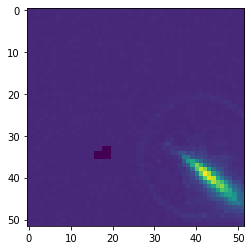

(1, 52, 52)
(52, 52)
1.0


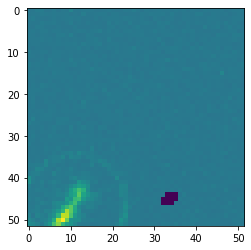

(1, 52, 52)
(52, 52)
1.0


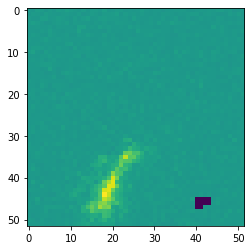

(1, 52, 52)
(52, 52)
0.934


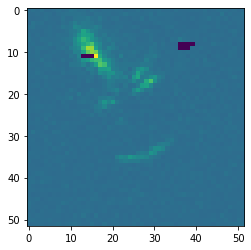

(1, 52, 52)
(52, 52)
1.0


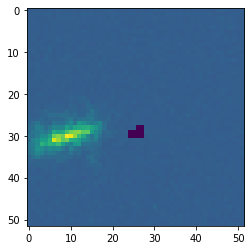

(1, 52, 52)
(52, 52)
1.0


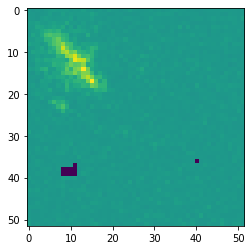

(1, 52, 52)
(52, 52)
1.0


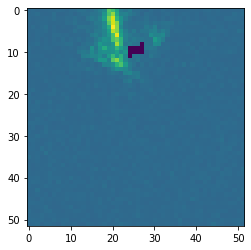

(1, 52, 52)
(52, 52)
1.0


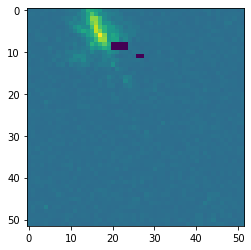

(1, 52, 52)
(52, 52)
1.0


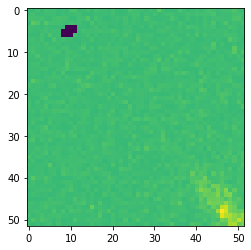

(1, 52, 52)
(52, 52)
1.0


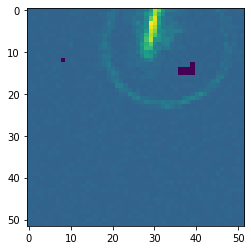

(1, 52, 52)
(52, 52)
1.0


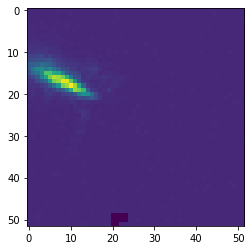

(1, 52, 52)
(52, 52)
1.0


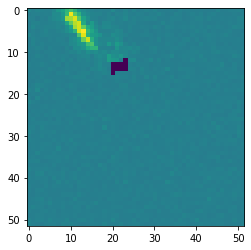

(1, 52, 52)
(52, 52)
1.0


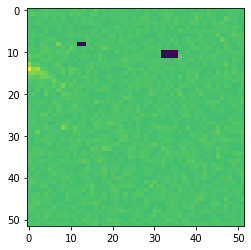

(1, 52, 52)
(52, 52)
1.0


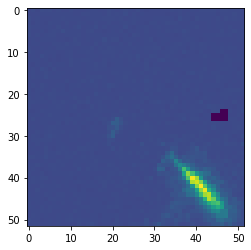

(1, 52, 52)
(52, 52)
1.0


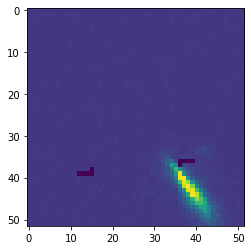

(1, 52, 52)
(52, 52)
1.0


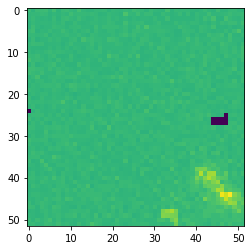

(1, 52, 52)
(52, 52)
1.0


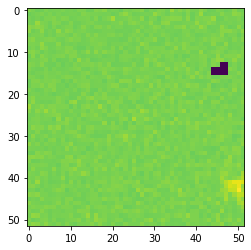

(1, 52, 52)
(52, 52)
1.0


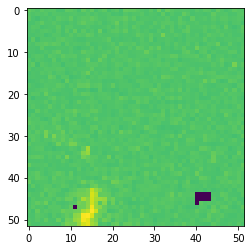

(1, 52, 52)
(52, 52)
0.89


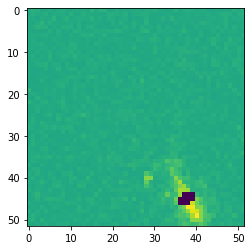

(1, 52, 52)
(52, 52)
1.0


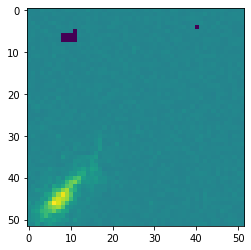

(1, 52, 52)
(52, 52)
1.0


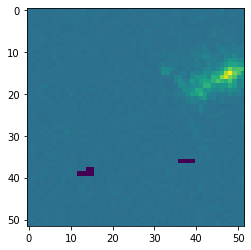

(1, 52, 52)
(52, 52)
1.0


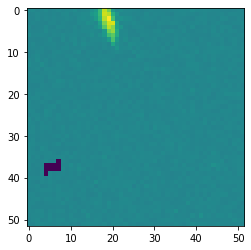

(1, 52, 52)
(52, 52)
1.0


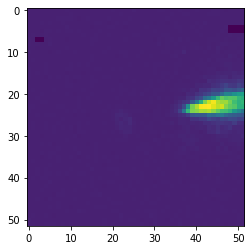

(1, 52, 52)
(52, 52)
1.0


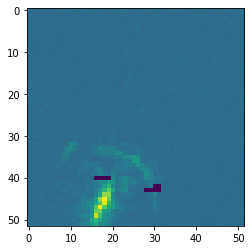

(1, 52, 52)
(52, 52)
1.0


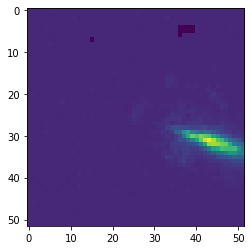

(1, 52, 52)
(52, 52)
1.0


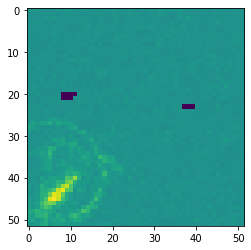

(1, 52, 52)
(52, 52)
1.0


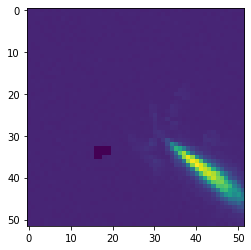

(1, 52, 52)
(52, 52)
1.0


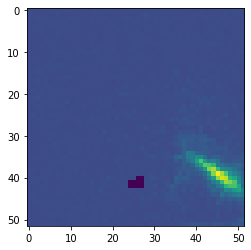

(1, 52, 52)
(52, 52)
1.0


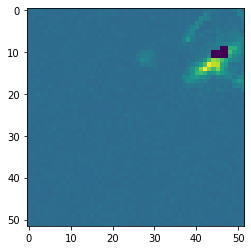

(1, 52, 52)
(52, 52)
1.0


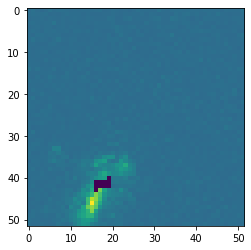

(1, 52, 52)
(52, 52)
1.0


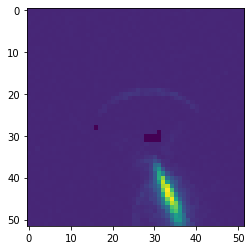

(1, 52, 52)
(52, 52)
1.0


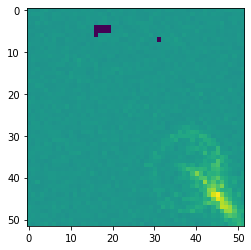

(1, 52, 52)
(52, 52)
1.0


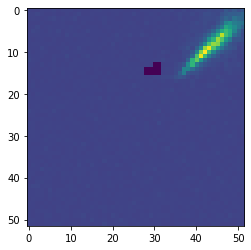

(1, 52, 52)
(52, 52)
1.0


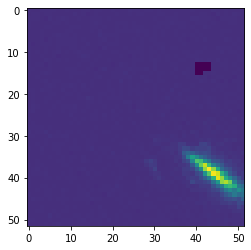

(1, 52, 52)
(52, 52)
1.0


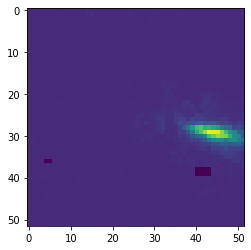

(1, 52, 52)
(52, 52)
1.0


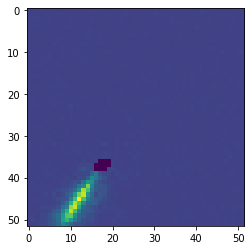

(1, 52, 52)
(52, 52)
1.0


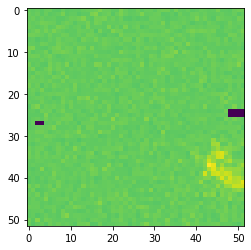

(1, 52, 52)
(52, 52)
1.0


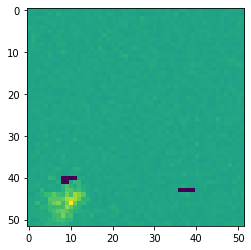

(1, 52, 52)
(52, 52)
1.0


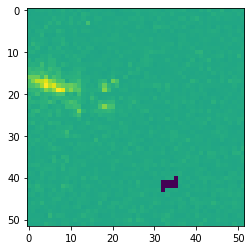

(1, 52, 52)
(52, 52)
1.0


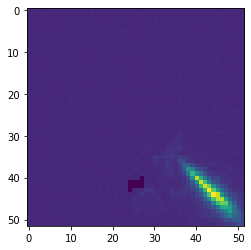

(1, 52, 52)
(52, 52)
1.0


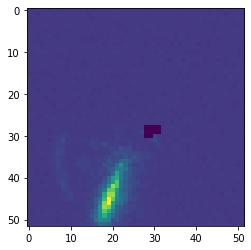

(1, 52, 52)
(52, 52)
1.0


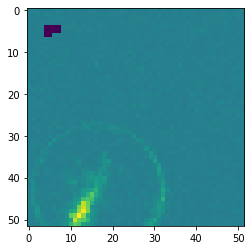

(1, 52, 52)
(52, 52)
1.0


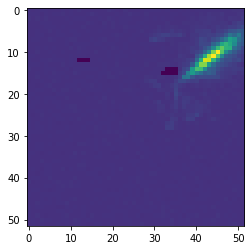

(1, 52, 52)
(52, 52)
1.0


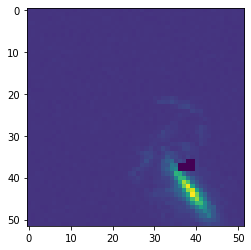

(1, 52, 52)
(52, 52)
1.0


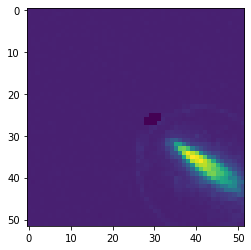

(1, 52, 52)
(52, 52)
1.0


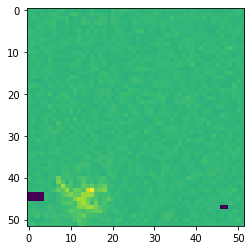

(1, 52, 52)
(52, 52)
1.0


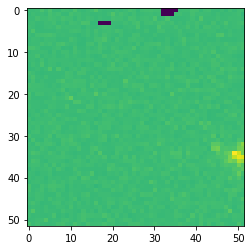

(1, 52, 52)
(52, 52)
1.0


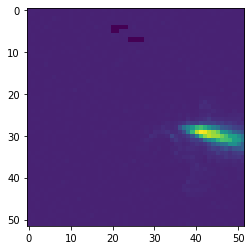

(1, 52, 52)
(52, 52)
1.0


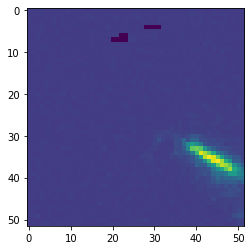

(1, 52, 52)
(52, 52)
1.0


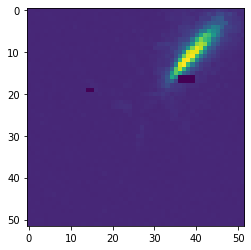

(1, 52, 52)
(52, 52)
1.0


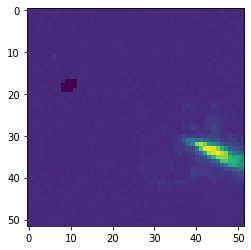

(1, 52, 52)
(52, 52)
1.0


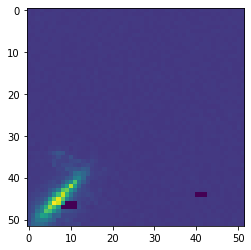

(1, 52, 52)
(52, 52)
1.0


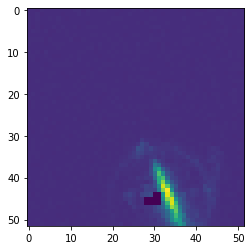

(1, 52, 52)
(52, 52)
1.0


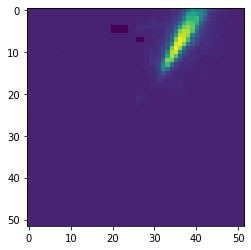

(1, 52, 52)
(52, 52)
1.0


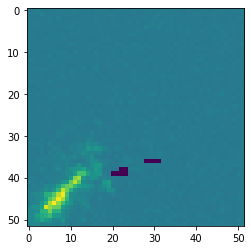

(1, 52, 52)
(52, 52)
1.0


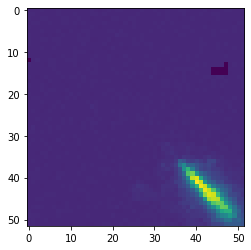

(1, 52, 52)
(52, 52)
1.0


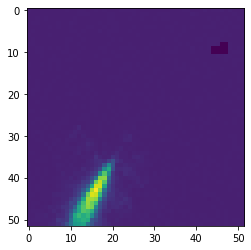

(1, 52, 52)
(52, 52)
1.0


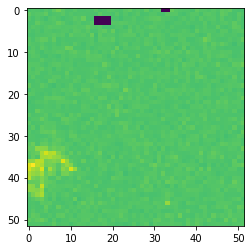

(1, 52, 52)
(52, 52)
1.0


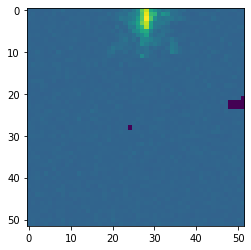

(1, 52, 52)
(52, 52)
1.0


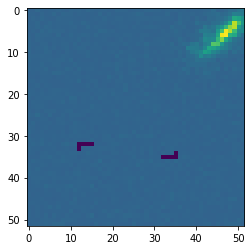

(1, 52, 52)
(52, 52)
1.0


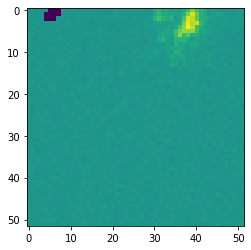

(1, 52, 52)
(52, 52)
1.0


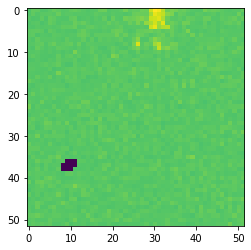

(1, 52, 52)
(52, 52)
1.0


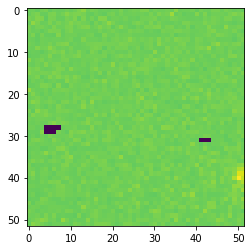

(1, 52, 52)
(52, 52)
1.0


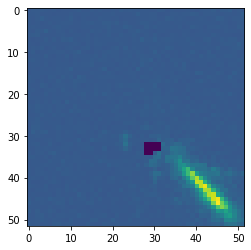

(1, 52, 52)
(52, 52)
1.0


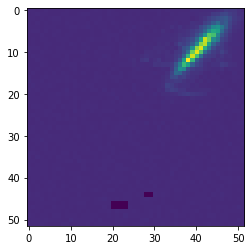

(1, 52, 52)
(52, 52)
1.0


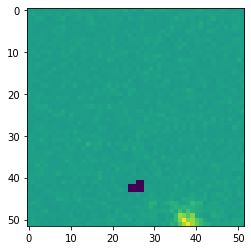

(1, 52, 52)
(52, 52)
1.0


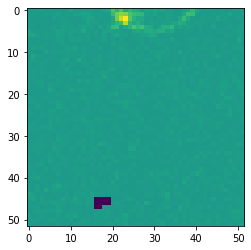

(1, 52, 52)
(52, 52)
1.0


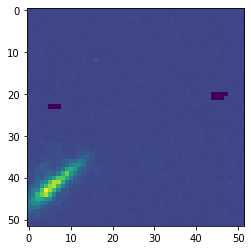

(1, 52, 52)
(52, 52)
1.0


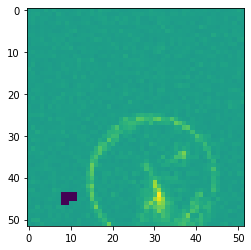

(1, 52, 52)
(52, 52)
1.0


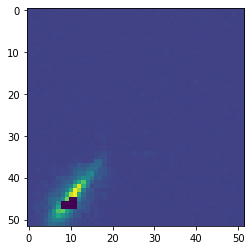

(1, 52, 52)
(52, 52)
1.0


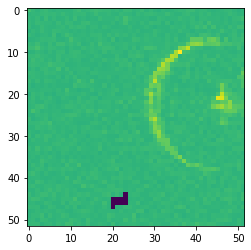

(1, 52, 52)
(52, 52)
1.0


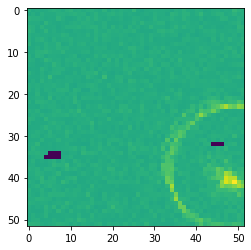

(1, 52, 52)
(52, 52)
1.0


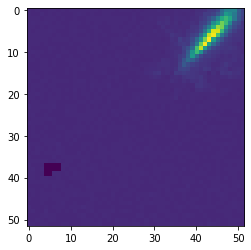

(1, 52, 52)
(52, 52)
1.0


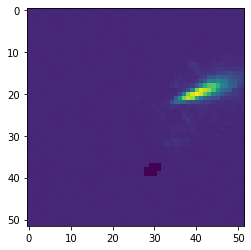

(1, 52, 52)
(52, 52)
1.0


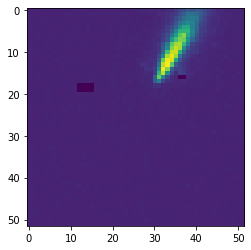

(1, 52, 52)
(52, 52)
1.0


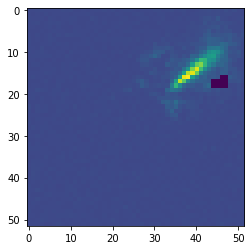

(1, 52, 52)
(52, 52)
1.0


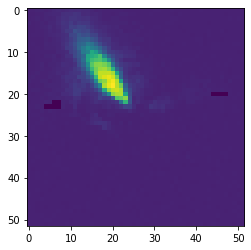

(1, 52, 52)
(52, 52)
1.0


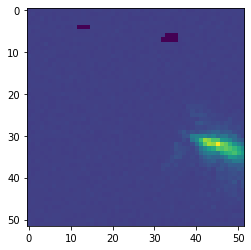

(1, 52, 52)
(52, 52)
1.0


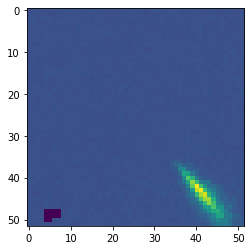

(1, 52, 52)
(52, 52)
1.0


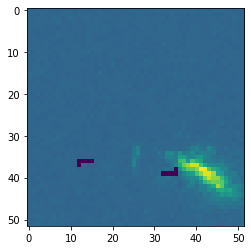

(1, 52, 52)
(52, 52)
1.0


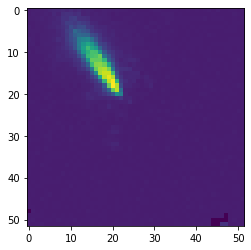

(1, 52, 52)
(52, 52)
1.0


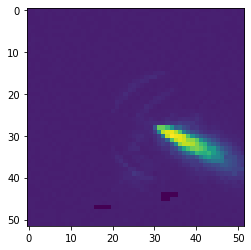

(1, 52, 52)
(52, 52)
1.0


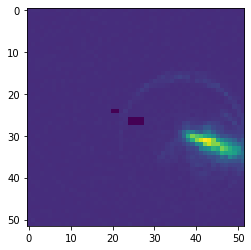

(1, 52, 52)
(52, 52)
1.0


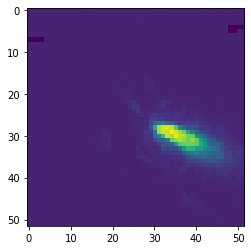

(1, 52, 52)
(52, 52)
1.0


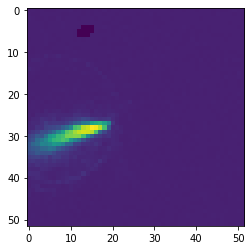

(1, 52, 52)
(52, 52)
1.0


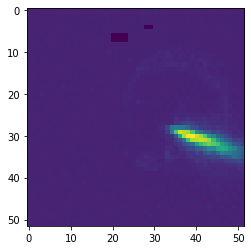

(1, 52, 52)
(52, 52)
1.0


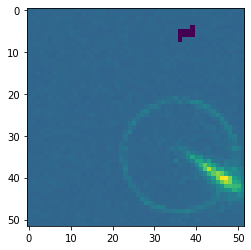

(1, 52, 52)
(52, 52)
1.0


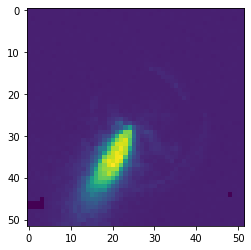

(1, 52, 52)
(52, 52)
1.0


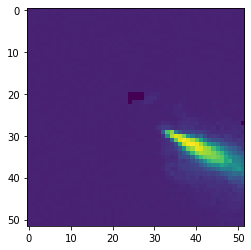

(1, 52, 52)
(52, 52)
1.0


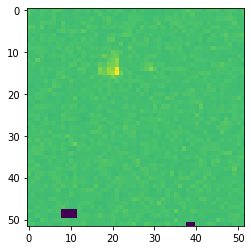

(1, 52, 52)
(52, 52)
1.0


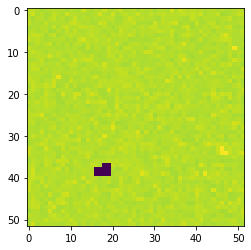

(1, 52, 52)
(52, 52)
1.0


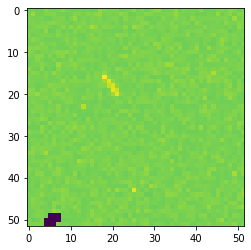

(1, 52, 52)
(52, 52)
1.0


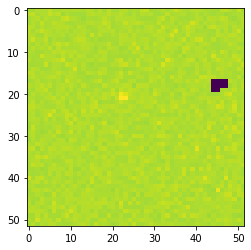

(1, 52, 52)
(52, 52)
1.0


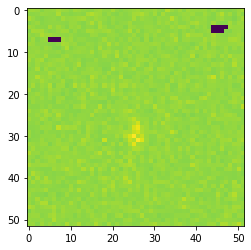

In [15]:
##list the false predicted images
images_list = []
test_y = []
predict = []
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = m(net(images))
        #new_outputs = outputs.view(10)
        predicted = (outputs.data > 0.5)

        predict.append((predicted.numpy().astype(int)))
        test_y.append(labels)
        images_list.append(images.numpy())

predict = np.vstack(predict).flatten()
test_y= np.vstack(test_y).flatten()
images_list = np.vstack(images_list)

false_predict_mask = ((predict == test_y) == False)
false_predict = predict[false_predict_mask]
false_predict_img = images_list[false_predict_mask]
false_predict_test_y = test_y[false_predict_mask]

false_pred_True0_mask = (false_predict_test_y == 0)
false_pred_True1_mask = (false_predict_test_y == 1)

false_pred_True0_img = false_predict_img[false_pred_True0_mask]
false_pred_True1_img = false_predict_img[false_pred_True1_mask]

print(len(false_pred_True0_img))
print(len(false_pred_True1_img))


##To get FP/FN as images:

def imshow_np(img):
    print(img.shape)
    print(img[0].shape)
    plt.imshow(img[0])
    print(np.max(img))
    plt.show()

for i in range(false_pred_True1_img.shape[0]):
    imshow_np(false_pred_True1_img[i:i+1])
    #plt.savefig('./{0:s}.png'.format(filename))#, np.c_data)

In [18]:
##List the false predictions as image file names so that it can be added to the next network
sample_fname_list = []
images_list = []
test_y = []
predict = []
with torch.no_grad():
    for i, (images, labels) in enumerate(testloader, 0):
        outputs = m(net(images))
        #new_outputs = outputs.view(10)
        predicted = (outputs.data > 0.5)
        sample_fname, _ = testloader.dataset.samples[i]
        #print(sample_fname)
        predict.append((predicted.numpy().astype(int)))
        test_y.append(labels)
        images_list.append(images.numpy())
        sample_fname_list.append(sample_fname)
predict = np.vstack(predict).flatten()
test_y= np.vstack(test_y).flatten()
images_list = np.vstack(images_list)
sample_fname_list = np.asarray(sample_fname_list)

false_predict_mask = ((predict == test_y) == False)
false_predict = predict[false_predict_mask]
false_predict_img = images_list[false_predict_mask]
false_predict_test_y = test_y[false_predict_mask]

false_pred_True0_mask = (false_predict_test_y == 0)
false_pred_True1_mask = (false_predict_test_y == 1)

false_pred_True0_img = false_predict_img[false_pred_True0_mask]
false_pred_True1_img = false_predict_img[false_pred_True1_mask]

false_predict_sample_fname_list = sample_fname_list[false_predict_mask]
#print(len(false_predict_sample_fname_list))

false_pred_True0_sample_fname_list = false_predict_sample_fname_list[false_pred_True0_mask]
false_pred_True1_sample_fname_list = false_predict_sample_fname_list[false_pred_True1_mask]
print(len(false_pred_True0_sample_fname_list))
print(len(false_pred_True1_sample_fname_list))
#print(false_pred_True1_sample_fname_list)
print(false_pred_True0_sample_fname_list)

27
173
['./data/gamma_proton_CNN_23-02-2021/test_set/gamma/276_gamma_eve_10_arr_5_b3.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN_23-02-2021/test_set/gamma/278_gamma_eve_23_arr_2_b105.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN_23-02-2021/test_set/gamma/278_gamma_eve_37_arr_5_b233.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN_23-02-2021/test_set/gamma/280_gamma_eve_11_arr_9_b20.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN_23-02-2021/test_set/gamma/318_gamma_23tev_eve_10_arr_0_b8.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN_23-02-2021/test_set/gamma/321_gamma_53tev_eve_9_arr_0_b6.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN_23-02-2021/test_set/gamma/340_gamma_41tev_eve_45_arr_0_b40.txt_cut.txt_40pe_noise.txt_norm.txt_panda_block.txt.npy'
 './data/gamma_proton_CNN

In [19]:
#Confusion matrix when batchsize = 1
import numpy as np 
TP, FP, TN, FN = 0,0,0,0
treshold = 0.5
#for  threshold in np.arange(0.0, 1.0, 0.05):
for data, label in testloader: #with batchsize 1
    predict = m(net(data))
    predict_class = predict > treshold
    if label == 1:  #-------------------------------Negitive-proton
        if predict_class == 1:
            TN+=1
        elif predict_class == 0:
            FP+=1

    elif label == 0:   #-----------------------------Positive-gamma
        if predict_class == 0:
            TP+=1
        elif predict_class == 1:
            FN+=1
            


print(TP)
print(FP)
print(FN)
print(TN)


623
173
27
857


In [20]:
#Confusion matrix when batchsize = 10
import numpy as np 
TP, FP, TN, FN = 0,0,0,0
treshold = 0.95
test_y=[]
y_score=[]
predict_class = []
with torch.no_grad():
    for data in testloader:
        images_test, labels_test=data
        outputs_test=m(net(images_test))
        new_outputs=outputs_test.view(10)
        predicted=(new_outputs.data > treshold)
        predicted_new = predicted.view(10)
        predict_class.append(predicted_new)
        y_score.append(new_outputs.numpy())
        test_y.append(labels_test)
y_score=np.vstack(y_score).flatten()
test_y=np.vstack(test_y).flatten()
predict_class = np.vstack(test_y).flatten()
if test_y.all() == 1:  #-------------------------------Negitive-proton
    if predict_class.all() == 1:
        TN+=1
    elif predict_class.all() == 0:
        FP+=1

elif test_y.all() == 0:   #-----------------------------Positive-gamma
    if predict_class.all() == 0:
        TP+=1
    elif predict_class.all() == 1:
        FN+=1



print(TP)
print(FP)
print(FN)
print(TN)
#print(predict_class)

RuntimeError: shape '[10]' is invalid for input of size 1

In [23]:
#Qfactor from a single network. In our case, there is 2. So have to consider the confusion matrix 
#from the second network too
gamma_efficiency = (class_correct[0]/class_total[0])
proton_efficiency = (FN/TP)
Q_factor = gamma_efficiency/(np.sqrt(proton_efficiency))
#print(gamma_efficiency)
print(Q_factor)

ZeroDivisionError: division by zero

29.66
0.98
0.03


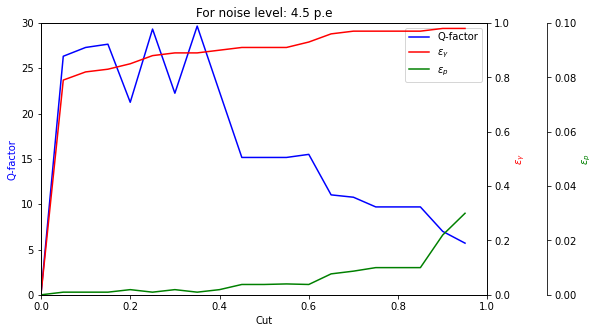

In [24]:
#Here onwards, Itake the Q factor from both the network(which I do manually) and plot it here as a 
#function of cut for different noise levels
#For noise level: 4.5 pe
cut = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
Q =   [0, 26.33, 27.3, 27.66, 21.25, 29.33, 22.25, 29.66, 22.4, 15.16, 15.16, 15.16, 15.5, 11.03, 10.77, 9.7, 9.7, 9.7, 7, 5.7]
eps_gamma = [0.0, 0.79, 0.82, 0.83,  0.85, 0.88, 0.89, 0.89, 0.90, 0.91, 0.91, 0.91, 0.93, 0.96, 0.97, 0.97, 0.97, 0.97, 0.98, 0.98]
eps_proton = [0.0, 0.00097, 0.00097, 0.00097, 0.0019, 0.00097, 0.0019, 0.00097, 0.0019, 0.0038, 0.0038, 0.004, 0.0038, 0.0077, 0.0087, 0.01, 0.01, 0.01, 0.022, 0.03]
# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(8,5)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
host.set_xlim(0, 1)
host.set_ylim(0, 30)
par1.set_ylim(0, 1)
par2.set_ylim(0, 0.1)
    
host.set_xlabel("Cut")
host.set_ylabel("Q-factor")
par1.set_ylabel('$\epsilon_{\gamma}$')
par2.set_ylabel("$\epsilon_{p}$")

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
#color3 = plt.cm.viridis(.9)

p1, = host.plot(cut, Q, color='blue', label="Q-factor")
p2, = par1.plot(cut, eps_gamma, color='red', label=r'$\epsilon_{\gamma}$')
p3, = par2.plot(cut, eps_proton, color='green', label=r'$\epsilon_{p}$')

lns = [p1, p2, p3]
host.legend(handles=lns, loc='best')

plt.title('For noise level: 4.5 p.e')
# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

# Best for professional typesetting, e.g. LaTeX
plt.savefig("4.5pe_noise.pdf")
# For raster graphics use the dpi argument. E.g. '[...].png", dpi=200)'
print(np.max(Q))
print(np.max(eps_gamma))
print(np.max(eps_proton))